<a href="https://colab.research.google.com/github/NakkaAnkarao8/cancer-detection/blob/main/Glove_clean_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/data/mtsamples.csv')

In [ ]:
data.head(5)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
data['transcription'] = data['transcription'] + ' ' + data['description'] + ' ' + data['keywords'] + ' ' + data['medical_specialty'] + ' ' + data['sample_name']

In [ ]:
data['medical_specialty'].value_counts()

In [ ]:
data_categories  = data.groupby(data['medical_specialty'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

In [ ]:
filtered_data_categories = data_categories.filter(lambda x:x.shape[0] > 50)
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
i=1
print('============Reduced Categories ======================')
for catName,dataCategory in final_data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1

print('============ Reduced Categories ======================')

In [ ]:
filtered_data_categories['medical_specialty'] =filtered_data_categories['medical_specialty'].apply(lambda x:str.strip(x))
mask = filtered_data_categories['medical_specialty'] == 'Surgery'
filtered_data_categories = filtered_data_categories[~mask]
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
mask = filtered_data_categories['medical_specialty'] == 'SOAP / Chart / Progress Notes'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'Office Notes'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'Consult - History and Phy.'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'Emergency Room Reports'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'Discharge Summary'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'Pain Management'
filtered_data_categories = filtered_data_categories[~mask]
mask = filtered_data_categories['medical_specialty'] == 'General Medicine'
filtered_data_categories = filtered_data_categories[~mask]


mask = filtered_data_categories['medical_specialty'] == 'Neurosurgery'
filtered_data_categories.loc[mask, 'medical_specialty'] = 'Neurology'
mask = filtered_data_categories['medical_specialty'] == 'Nephrology'
filtered_data_categories.loc[mask, 'medical_specialty'] = 'Urology'


i=1
print('============Reduced Categories======================')
for catName,dataCategory in final_data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('============Reduced Categories======================')


data = filtered_data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape

In [ ]:
data = data[['transcription', 'medical_specialty']]

In [ ]:
data_counts = data['medical_specialty'].value_counts()
data_counts = data_counts[data_counts<=100].index
data = data[~data['medical_specialty'].isin(data_counts)]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['medical_specialty'] = le.fit_transform(data['medical_specialty'])

In [ ]:
data['transcription'] = data.loc[:,'transcription'].apply(lambda X : str(X).lower())

In [ ]:
import string
from nltk.tokenize import word_tokenize
def text_preprocess(mess):
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  return nopunc

In [ ]:
data['transcription'] = data['transcription'].apply(lambda X : text_preprocess(str(X)))

In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [ ]:
data['transcription'] = data['transcription'].apply(stemSentence)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
def remove_stopwords(text):
    custom_stopwords = set(stopwords.words('english')) - set(['no', 'not', 'never', 'nobody', "aren't", "wasn't", "weren't", "hasn't", "haven't", "won't","isn't","couldn't","don't","shouldn't","but","didn't","mustn't","couldn't","mightn't","needn't","shan't"])
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    filtered_text = ' '.join(filtered_words)

    return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install contractions

In [ ]:
import contractions

data['transcription'] = data['transcription'].apply(contractions.fix)

In [ ]:
data['transcription'] = data['transcription'].apply(remove_stopwords)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
embeddings_dict = dict()
f = open('/content/gdrive/MyDrive/data/glove.6B.300d.txt',encoding= 'utf-8')
for line in f:
      values = line.split()
      word = values[0]
      vectors = np.asarray(values[1:], dtype ='float32')
      embeddings_dict[word] = vectors
f.close()
len(embeddings_dict)

47369

In [ ]:
from sklearn.model_selection import train_test_split
X = (data['transcription'])
y = (data['medical_specialty'])
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 1)

In [ ]:
# Function to convert a sentence to its average word vector representation using GloVe
def sentence_to_avg_word_vector(sentence):
    word_vectors = []
    for word in sentence.split():
        if word in embeddings_dict:
            word_vectors.append(embeddings_dict[word])
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros_like(embeddings_dict['a'])  # Return zero vector if no word vectors found

In [ ]:
data_glove= np.array([sentence_to_avg_word_vector(sentence)for sentence in data['transcription']])

In [ ]:
X = data_glove
y = data['medical_specialty']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 1)

In [ ]:
# Convert the text data to average word vector representations
X_train_vect_avg = np.array([sentence_to_avg_word_vector(sentence) for sentence in X_train])
X_test_vect_avg = np.array([sentence_to_avg_word_vector(sentence) for sentence in X_test])

In [ ]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)
Imbalanced-Learn 0.8.0

In [ ]:
!pip install imbalanced-learn-extra

In [ ]:
!pip imblearn.over_sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN,BorderlineSMOTE

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN
smote_sample = SMOTE(sampling_strategy='minority')
labels = data['medical_specialty']
X ,y= smote_sample.fit_resample(data_glove, labels)

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN
adasyn_sample = ADASYN(sampling_strategy= 'minority')
labels = data['medical_specialty']
X, y = adasyn_sample.fit_resample(data_glove, labels)

In [ ]:
!pip install smote-variants

In [ ]:
import smote_variants

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN
msmote_sample = smote_variants.MSMOTE()
labels = data['medical_specialty']
labels = labels.squeeze()
X, y = msmote_sample.sample(data_glove, labels)

In [ ]:
oversampler= smote_variants.MSMOTE()

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN
somteenn_sample = SMOTEENN(sampling_strategy= 'minority')
labels = data['medical_specialty']
X, y = somteenn_sample.fit_resample(data_glove, labels)

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN
random_sample = RandomOverSampler(sampling_strategy= 'minority')
labels = data['medical_specialty']
X, y = random_sample.fit_resample(data_glove, labels)

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN
border_sample = BorderlineSMOTE(sampling_strategy= 'minority')
labels = data['medical_specialty']
X, y = border_sample.fit_resample(data_glove, labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7435728411338167

In [ ]:
from sklearn import metrics
test_expected = y_test
test_predicted = logreg.predict(X_test)
print(metrics.classification_report(test_predicted, test_expected))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80        66
           1       0.77      0.85      0.81        20
           2       0.63      0.73      0.68        33
           3       0.33      0.33      0.33         9
           4       0.53      0.47      0.50        55
           5       0.75      0.92      0.83        26
           6       0.81      1.00      0.90        13
           7       0.74      0.67      0.70        63
           8       0.14      1.00      0.25         1
           9       0.60      1.00      0.75         3
          10       0.30      0.37      0.33        43
          11       0.78      0.65      0.70        48

    accuracy                           0.65       380
   macro avg       0.61      0.73      0.63       380
weighted avg       0.68      0.65      0.66       380



In [ ]:
from sklearn.metrics import confusion_matrix
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
labels = category_list
cm = confusion_matrix(y_test, test_predicted)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,12))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.7027027027027027

In [ ]:
test_predicted = svc.predict(X_test)
print(metrics.classification_report(test_predicted, y_test))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        68
           1       0.59      0.87      0.70        15
           2       0.58      0.69      0.63        32
           3       0.22      0.33      0.27         6
           4       0.59      0.52      0.55        56
           5       0.66      0.88      0.75        24
           6       0.75      1.00      0.86        12
           7       0.79      0.68      0.73        66
           8       0.14      1.00      0.25         1
           9       0.00      0.00      0.00         0
          10       0.36      0.37      0.36        52
          11       0.78      0.65      0.70        48

    accuracy                           0.63       380
   macro avg       0.53      0.64      0.55       380
weighted avg       0.67      0.63      0.64       380



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
labels = category_list
cm = confusion_matrix(y_test, test_predicted)

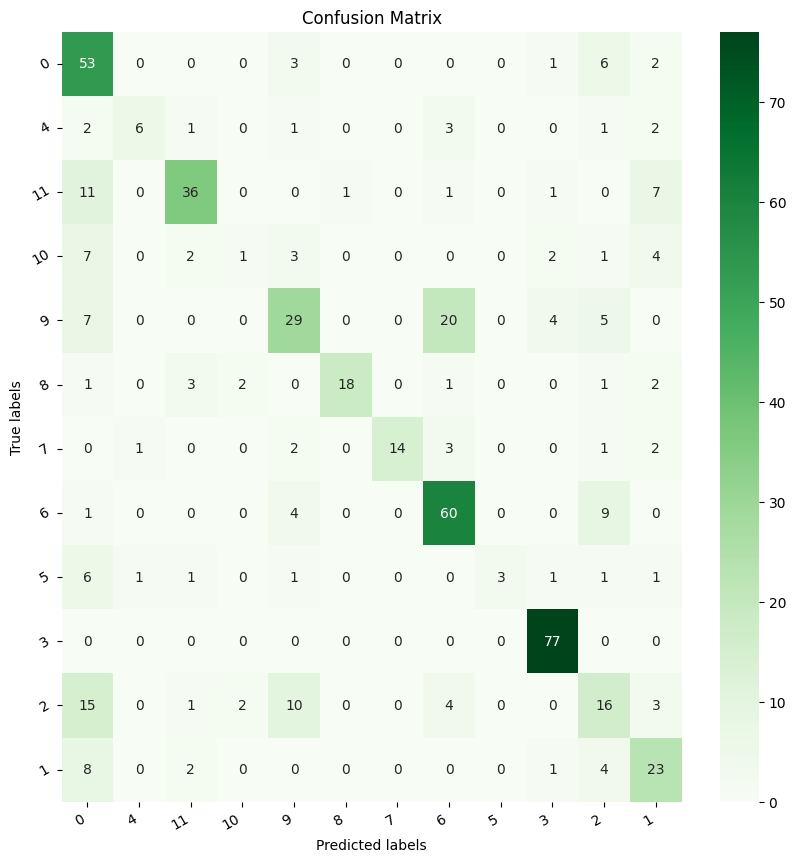

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.8727752142386289

In [ ]:
test_predicted = rfc.predict(X_test)
print(metrics.classification_report(test_predicted, y_test))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        66
           1       0.45      0.71      0.56        14
           2       0.55      0.58      0.57        36
           3       0.00      0.00      0.00         6
           4       0.51      0.42      0.46        60
           5       0.47      0.65      0.55        23
           6       0.69      1.00      0.81        11
           7       0.61      0.52      0.56        67
           8       0.14      0.14      0.14         7
           9       0.40      0.67      0.50         3
          10       0.06      0.06      0.06        47
          11       0.62      0.62      0.62        40

    accuracy                           0.48       380
   macro avg       0.43      0.49      0.45       380
weighted avg       0.50      0.48      0.49       380



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)

0.8727752142386289

In [ ]:
test_predicted = dtc.predict(X_test)
print(metrics.classification_report(test_predicted, y_test))

              precision    recall  f1-score   support

           0       0.35      0.32      0.33        56
           1       0.27      0.25      0.26        24
           2       0.29      0.34      0.31        32
           3       0.11      0.06      0.08        16
           4       0.37      0.26      0.31        69
           5       0.03      0.04      0.03        27
           6       0.38      0.32      0.34        19
           7       0.33      0.43      0.38        44
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3
          10       0.02      0.03      0.02        36
          11       0.42      0.40      0.41        42

    accuracy                           0.26       380
   macro avg       0.21      0.20      0.21       380
weighted avg       0.27      0.26      0.26       380



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train)

0.8727752142386289

In [ ]:
test_predicted = gbc.predict(X_test)
print(metrics.classification_report(test_predicted, y_test))

              precision    recall  f1-score   support

           0       0.77      0.63      0.70        63
           1       0.41      0.56      0.47        16
           2       0.55      0.66      0.60        32
           3       0.00      0.00      0.00         6
           4       0.51      0.41      0.45        61
           5       0.62      0.65      0.63        31
           6       0.56      0.90      0.69        10
           7       0.63      0.57      0.60        63
           8       0.14      0.20      0.17         5
           9       0.20      0.33      0.25         3
          10       0.08      0.09      0.08        43
          11       0.68      0.57      0.62        47

    accuracy                           0.51       380
   macro avg       0.43      0.47      0.44       380
weighted avg       0.54      0.51      0.52       380



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
abc.score(X_train, y_train)


0.23533289386947923

In [ ]:
test_predicted = abc.predict(X_test)
print(metrics.classification_report(test_predicted, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         0
           2       0.71      0.18      0.29       149
           3       0.00      0.00      0.00         0
           4       0.14      0.64      0.23        11
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.81      0.23      0.36       201
           8       0.00      0.00      0.00         0
           9       0.80      0.36      0.50        11
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         5

    accuracy                           0.22       380
   macro avg       0.21      0.12      0.11       380
weighted avg       0.73      0.22      0.32       380



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
